In [22]:
# Import packages
import os
import pandas as pd  
import seaborn as sns
import numpy as np 
import re, time, random, datetime
import traceback
import warnings # v 1.0.1
import matplotlib.pyplot as plt # v 3.5.2

In [3]:
os.getcwd()
os.chdir('/Users/camela/iCloud Drive (Archive)/Desktop/DICKINSON/YEAR/JUNIOR/DATA400/Mini Project')
pd.set_option('display.max_columns', None)

# A. Clean Data


## 1. Raw data 

### Load combine csv file

In [4]:
f1_opt = pd.read_csv('Data/OriginalData/2023/F1_OPT.csv', low_memory=False)
f1_opt = f1_opt.drop_duplicates()

In [5]:
#Convert to appropriate format
date_columns = [
    'First Entry Date', 'Last Entry Date', 'Program Start Date', 'Program End Date', 'Last Departure Date',
    'Visa Issue Date', 'Visa Expiration Date', 'Program End Date',
    'Authorization Start Date', 'Authorization End Date',
    'OPT Authorization Start Date', 'OPT Authorization End Date',
    'OPT Employer Start Date', 'OPT Employer End Date'
]

for column in date_columns:
    if column in f1_opt.columns:
        f1_opt[column] = pd.to_datetime(f1_opt[column], errors='coerce')

In [6]:
#Check missing data
print(f1_opt.isna().sum().sort_values(ascending=False))

Minor Description               2791963
Major 2 Description             2710962
On-Campus Employment            2357701
Requested Status                2124344
OPT Employer End Date           2019045
Job Title                       1642143
OPT Employer Start Date         1409228
Unemployment Days               1383566
OPT Authorization End Date      1369833
Employment OPT Type             1369817
OPT Authorization Start Date    1369817
Funds From This School          1311734
Visa Issue Date                 1104448
Funds from Other Sources         867874
Last Departure Date              328043
Employer City                    205581
Employer State                   205524
Employer Zip Code                204735
Employer Name                    204618
Visa Expiration Date             191542
Authorization End Date           176502
Authorization Start Date         176486
Employment Time                  176486
Employment Description           163142
Last Entry Date                   99811


In [7]:
f1_opt.dtypes

Country of Birth                        object
Country of Citizenship                  object
First Entry Date                datetime64[ns]
Last Entry Date                 datetime64[ns]
Last Departure Date             datetime64[ns]
Class of Admission                      object
Visa Issue Date                 datetime64[ns]
Visa Expiration Date            datetime64[ns]
School Name                             object
Campus City                             object
Campus State                            object
Campus Zip Code                          int64
Major 1 CIP Code                       float64
Major 1 Description                     object
Major 2 CIP Code                       float64
Major 2 Description                     object
Minor CIP Code                         float64
Minor Description                       object
Program Start Date              datetime64[ns]
Program End Date                datetime64[ns]
Employer Name                           object
Employer City

### Rename col

In [8]:
f1_opt.columns = (
    f1_opt.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("&", "and")
        .str.replace("'", "")
)

In [9]:
len(f1_opt[f1_opt["student_key"] == 438027])

40

In [10]:
multi_deg = (
    f1_opt.groupby("individual_key")["student_edu_level_desc"]
    .nunique()
)

multi_deg.value_counts().sort_index()

student_edu_level_desc
1    382938
2     22132
3        19
Name: count, dtype: int64

### Create new data set without working experience

In [337]:
f1_opt["employment_description"].value_counts()

employment_description
OPT    1588156
CPT    1161281
Name: count, dtype: int64

In [338]:
# Step 1: Keep OPT records
opt_df = f1_opt[
    f1_opt["employment_description"].str.contains("OPT", case=False, na=False)
].copy()

# Step 2: Keep FULL TIME only (apply filter to opt_df!)
opt_df = opt_df[
    opt_df["employment_time"].str.contains("FULL TIME", case=False, na=False)
].copy()

In [339]:
opt_df["employment_description"].value_counts()

employment_description
OPT    1456093
Name: count, dtype: int64

In [340]:
opt_df["employment_time"].value_counts()

employment_time
FULL TIME    1456093
Name: count, dtype: int64

In [15]:
#Check missing data
print(opt_df.isna().sum().sort_values(ascending=False))

minor_description               1395346
major_2_description             1368845
on-campus_employment            1199206
requested_status                 965611
opt_employer_end_date            713866
funds_from_this_school           712895
visa_issue_date                  537355
funds_from_other_sources         365545
job_title                        288689
opt_employer_start_date          234924
unemployment_days                216478
opt_authorization_end_date       209642
opt_authorization_start_date     209628
employment_opt_type              209628
last_departure_date              164159
visa_expiration_date              87538
last_entry_date                   45365
first_entry_date                  45365
employer_city                     35470
employer_state                    35428
employer_zip_code                 34681
employer_name                     34563
students_personal_funds             504
major_2_cip_code                    341
minor_cip_code                      337


In [16]:
len(opt_df[opt_df["student_key"] == 438027])

15

In [17]:
opt_df[opt_df["student_key"] == 438027]
#opt_df.drop(employer_name	employer_city	employer_state	employer_zip_code	job_title	employment_description

,country_of_birth,country_of_citizenship,first_entry_date,last_entry_date,last_departure_date,class_of_admission,visa_issue_date,visa_expiration_date,school_name,campus_city,campus_state,campus_zip_code,major_1_cip_code,major_1_description,major_2_cip_code,major_2_description,minor_cip_code,minor_description,program_start_date,program_end_date,employer_name,employer_city,employer_state,employer_zip_code,job_title,employment_description,authorization_start_date,authorization_end_date,opt_authorization_start_date,opt_authorization_end_date,opt_employer_start_date,opt_employer_end_date,employment_opt_type,employment_time,unemployment_days,tuition_and_fees,students_personal_funds,funds_from_this_school,funds_from_other_sources,on-campus_employment,requested_status,status_code,student_edu_level_desc,individual_key,student_key
2999973,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,IRVING,TX,75063,NaN,OPT,2021-06-21,2022-06-20,2021-06-21,2022-06-20,2021-06-21,2021-08-06,POST-COMPLETION,FULL TIME,0.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999974,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,IRVING,TX,75063,NaN,OPT,2021-06-21,2022-06-20,2021-06-21,2022-06-20,2021-07-23,NaT,POST-COMPLETION,FULL TIME,0.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999975,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,IRVING,TX,75063,NaN,OPT,2021-06-21,2022-06-20,2021-06-21,2022-06-20,2021-08-07,NaT,POST-COMPLETION,FULL TIME,0.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999976,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,IRVING,TX,75063,NaN,OPT,2022-06-21,2023-06-08,2022-06-21,2023-06-08,2022-06-21,2022-09-23,STEM,FULL TIME,78.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999977,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,IRVING,TX,75063,NaN,OPT,2022-06-21,2023-06-08,2022-06-21,2023-06-08,2022-09-26,2023-03-24,STEM,FULL TIME,78.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999982,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,PHILADELPHIA,PA,19102,Senior Professional Data Sciences,OPT,2021-06-21,2022-06-20,2021-06-21,2022-06-20,2021-06-21,2021-08-06,POST-COMPLETION,FULL TIME,0.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999983,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,PHILADELPHIA,PA,19102,Senior Professional Data Sciences,OPT,2021-06-21,2022-06-20,2021-06-21,2022-06-20,2021-07-23,NaT,POST-COMPLETION,FULL TIME,0.0,36056.0,0.0,NaN,58789.0,NaN,NaN,COMPLETED,MASTER'S,405088,438027
2999984,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,Computer Sciences Corporation,PHILADELPHIA,PA,19102,Senior Professional

In [341]:
opt_df["employment_opt_type"].value_counts()

employment_opt_type
POST-COMPLETION    781133
STEM               461030
PRE-COMPLETION       4302
Name: count, dtype: int64

In [347]:
opt_df["program_end_date"].dt.year.value_counts()

program_end_date
2020    494082
2021    447056
2022    261875
2019    174806
2023     77214
2024       612
2025       229
2026       100
2018        67
2027        18
2016        16
2015         9
2029         4
2028         3
2005         1
2017         1
Name: count, dtype: int64

### Standard Post-Grad OPT
- Only keep STEM and POST-COMPLETION
- Create a dummy variable "is_stem" (0 = no, 1 = yes)
- Double check if "is_stem" labels are correct
  

In [342]:
# Keep only standard post-grad OPT (no pre-completion)
post_opt = opt_df[opt_df["employment_opt_type"].isin(["POST-COMPLETION", "STEM"])].copy()

post_opt["employment_opt_type"].value_counts()

employment_opt_type
POST-COMPLETION    781133
STEM               461030
Name: count, dtype: int64

In [343]:
# Row-level STEM flag (temporary)
post_opt["stem_flag"] = (post_opt["employment_opt_type"] == "STEM").astype(int)

# Student-level STEM flag: 1 if student ever had STEM
student_stem = (
    post_opt.groupby("student_key", as_index=False)["stem_flag"]
    .max()
    .rename(columns={"stem_flag": "is_stem"})
)

# Drop the temporary row-level stem_flag BEFORE merge so we don't get _x/_y
post_opt = post_opt.drop(columns=["stem_flag"])

# Merge student-level is_stem back onto each record
post_opt = post_opt.merge(student_stem, on="student_key", how="left")

In [26]:
check = (
    post_opt.groupby("student_key")["employment_opt_type"]
    .unique()
)

# students labeled STEM but without STEM in their actual types
problem_ids = [
    sid for sid in stem_ids
    if "STEM" not in check[sid]
]

len(problem_ids)

0

In [27]:
sid = 438027

cols = [
    "student_key",
    "individual_key",
    "authorization_end_date",
    "opt_authorization_start_date",
    "opt_authorization_end_date",
    "opt_employer_start_date",
    "opt_employer_end_date",
    "employment_opt_type",
    "status_code",
    "employer_name",
    "employer_city",
    "employer_state",
    "job_title",
]

s = post_opt.loc[post_opt["student_key"] == sid, cols].copy()
s.sort_values(["opt_authorization_start_date", "opt_authorization_end_date"], ascending=False)

,student_key,individual_key,authorization_end_date,opt_authorization_start_date,opt_authorization_end_date,opt_employer_start_date,opt_employer_end_date,employment_opt_type,status_code,employer_name,employer_city,employer_state,job_title
1242151,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-06-21,2022-09-23,STEM,COMPLETED,Computer Sciences Corporation,IRVING,TX,NaN
1242152,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-09-26,2023-03-24,STEM,COMPLETED,Computer Sciences Corporation,IRVING,TX,NaN
1242156,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-06-21,2022-09-23,STEM,COMPLETED,Computer Sciences Corporation,PHILADELPHIA,PA,Senior Professional Data Sciences
1242157,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-09-26,2023-03-24,STEM,COMPLETED,Computer Sciences Corporation,PHILADELPHIA,PA,Senior Professional Data Sciences
1242161,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-06-21,2022-09-23,STEM,COMPLETED,Computer Sciences Corporation,TYSONS,VA,NaN
1242162,438027,405088,2023-06-08,2022-06-21,2023-06-08,2022-09-26,2023-03-24,STEM,COMPLETED,Computer Sciences Corporation,TYSONS,VA,NaN
1242148,438027,405088,2022-06-20,2021-06-21,2022-06-20,2021-06-21,2021-08-06,POST-COMPLETION,COMPLETED,Computer Sciences Corporation,IRVING,TX,NaN
1242149,438027,405088,2022-06-20,2021-06-21,2022-06-20,2021-07-23,NaT,POST-COMPLETION,COMPLETED,Computer Sciences Corporation,IRVING,TX,NaN
1242150,438027,405088,2022-06-20,2021-06-21,2022-06-20,2021-08-07,NaT,POST-COMPLETION,COMPLETED,Computer Sciences Corporation,IRVING,TX,NaN
1242153,438027,405088,2022-06-20,2021-06-21,2022-06-20,2021-06-21,2021-08-06,POST-COMPLETION,COMPLETED,Computer Sciences Corporation,PHILADELPHIA,PA,Senior Professional Data Sciences


In [28]:
post_opt = post_opt.drop(
    columns=["employer_name", "employer_city", "employer_state", 
             "job_title", "unemployment_days","employer_zip_code","on-campus_employment"],
    errors="ignore"
)
post_opt.duplicated().sum()

781676

In [29]:
post_opt = post_opt.drop_duplicates()
post_opt.duplicated().sum()

0

In [30]:
post_opt["student_key"].duplicated().sum()
post_opt["student_key"].nunique()

217931

In [31]:
#Check if anyone has 2 status codes
status_counts = (
    post_opt.groupby("student_key")["employment_opt_type"]
    .nunique()
)

status_counts.value_counts()

employment_opt_type
2    115911
1    102020
Name: count, dtype: int64

In [32]:
#double check is stem student
post_opt["is_stem"].value_counts() #many duplicates 

is_stem
1    333909
0    126578
Name: count, dtype: int64

In [346]:
pd.crosstab(
    opt_df["program_end_date"].dt.year,
    opt_df["is_stem"]
).sort_index()

# Rename columns
year_stem_counts.columns = ["Non-STEM", "STEM"]

print(year_stem_counts)

KeyError: 'is_stem'

## 2. Cleaned Data OPT Post-Graduation

In [34]:
opt_clean = post_opt.copy()

opt_clean = opt_clean.drop(
    columns=[
        "authorization_start_date",
        "authorization_end_date",
        "opt_authorization_start_date",
        "opt_authorization_end_date",
        "opt_employer_start_date",
        "opt_employer_end_date",
        "employment_opt_type",
        "employment_time",
        "requested_status"
    ],errors="ignore")


In [35]:
#check duplicate rows
opt_clean.duplicated().sum()

242556

In [36]:
#Drop duplicate rows
opt_clean = opt_clean.drop_duplicates()
opt_clean.duplicated().sum()

0

In [37]:
opt_clean[opt_clean["individual_key"] == 405088]

,country_of_birth,country_of_citizenship,first_entry_date,last_entry_date,last_departure_date,class_of_admission,visa_issue_date,visa_expiration_date,school_name,campus_city,campus_state,campus_zip_code,major_1_cip_code,major_1_description,major_2_cip_code,major_2_description,minor_cip_code,minor_description,program_start_date,program_end_date,employment_description,tuition_and_fees,students_personal_funds,funds_from_this_school,funds_from_other_sources,status_code,student_edu_level_desc,individual_key,student_key,is_stem
1242148,INDIA,INDIA,2019-09-16,2023-03-23,2023-03-27,F1,NaT,2024-08-06,Drexel University,Philadelphia,PENNSYLVANIA,19104,11.0401,Information Science/Studies,0.0,NaN,0.0,NaN,2019-09-23,2021-06-12,OPT,36056.0,0.0,NaN,58789.0,COMPLETED,MASTER'S,405088,438027,1


In [38]:
post_opt["status_code"].value_counts()

status_code
COMPLETED      210026
ACTIVE         202364
DEACTIVATED     37605
TERMINATED      10492
Name: count, dtype: int64

In [39]:
opt_clean["status_code"].value_counts()

status_code
ACTIVE         103925
COMPLETED       92536
DEACTIVATED     17145
TERMINATED       4325
Name: count, dtype: int64

### Double check stem with cleaned data

In [40]:
#double check is stem student
opt_clean["is_stem"].value_counts()

is_stem
1    115936
0    101995
Name: count, dtype: int64

In [41]:
status_counts.value_counts()

employment_opt_type
2    115911
1    102020
Name: count, dtype: int64

### Double check total observation

In [42]:
f1_opt["individual_key"].nunique() #including pre-completion OPT

405089

In [43]:
post_opt["individual_key"].nunique()

217931

In [44]:
opt_clean["individual_key"].nunique()

217931

In [336]:
pd.crosstab(
    opt_clean["program_end_year"],
    opt_clean["is_stem"]
).sort_index()

# Rename columns
year_stem_counts.columns = ["Non-STEM", "STEM"]

print(year_stem_counts)

                  Non-STEM   STEM
program_end_year                 
2019                   503  13297
2020                  1280  38588
2021                 18494  43849
2022                 42816  20171
2023                 38852     16


### Match Cip code
- OPT data < 2023 only
- Add new var major1_cip_2digits, major1_cip_2digits keep only 2 digits

In [332]:
cip = pd.read_csv('Data/OriginalData/2023/CIPCode2020.csv', low_memory=False)
cip_cleaned = cip.copy()

cip_cleaned["CIPCode"] = (
    cip_cleaned["CIPCode"]
    .astype(str)
    .str.replace('="', "", regex=False)
    .str.replace('"', "", regex=False)
)

In [333]:
obs = opt_clean.copy()

# Filter years
obs["program_end_year"] = obs["program_end_date"].dt.year
obs = obs[obs["program_end_year"] <= 2023]

In [334]:
print(obs.isna().sum().sort_values(ascending=False))

minor_description           206360
major_2_description         203429
funds_from_this_school       97915
visa_issue_date              82776
funds_from_other_sources     62180
last_departure_date          24160
visa_expiration_date         14717
first_entry_date              7267
last_entry_date               7267
students_personal_funds         33
major_2_cip_code                27
minor_cip_code                  26
tuition_and_fees                14
major_1_cip_code                 2
major_1_description              2
status_code                      0
individual_key                   0
student_key                      0
is_stem                          0
student_edu_level_desc           0
country_of_birth                 0
employment_description           0
program_end_date                 0
program_start_date               0
country_of_citizenship           0
campus_zip_code                  0
campus_state                     0
campus_city                      0
school_name         

- Extract 2-digit CIP from obs (keep part before dot, e.g., 11.0701 -> 11)

In [236]:
obs["major1_cip"] = (
    obs["major_1_cip_code"].astype("string").str.strip()
      .str.split(".").str[0].str.zfill(2)
)

obs["major2_cip"] = (
    obs["major_2_cip_code"].astype("string").str.strip()
      .str.split(".").str[0].str.zfill(2)
)

obs["minor_cip"] = (
    obs["minor_cip_code"].astype("string").str.strip()
      .str.split(".").str[0].str.zfill(2)
)

# treat invalid codes as missing
invalid = ["00", "0", "<NA>", "nan", "None", ""]
for col in ["major1_cip", "major2_cip", "minor_cip"]:
    obs.loc[obs[col].isin(invalid), col] = pd.NA

In [237]:
(obs["major_2_cip_code"] == 0).sum() # 203402 major 2 = 0)
obs[["major1_cip", "major2_cip", "minor_cip"]].isna().sum()

major1_cip         2
major2_cip    203429
minor_cip     206360
dtype: int64

Missing titles:
- major1_title         2
- major2_title    203429
- minor_title     206360

In [240]:
# Major 1
obs = obs.merge(
    cip_cleaned[["CIPCode", "CIPTitle"]].rename(
        columns={"CIPCode": "major1_cip", "CIPTitle": "major1_title"}
    ),
    on="major1_cip",
    how="left"
)

# Major 2
obs = obs.merge(
    cip_cleaned[["CIPCode", "CIPTitle"]].rename(
        columns={"CIPCode": "major2_cip", "CIPTitle": "major2_title"}
    ),
    on="major2_cip",
    how="left"
)

# Minor
obs = obs.merge(
    cip_cleaned[["CIPCode", "CIPTitle"]].rename(
        columns={"CIPCode": "minor_cip", "CIPTitle": "minor_title"}
    ),
    on="minor_cip",
    how="left"
)

In [241]:
print("Missing titles:")
print(obs[["major1_title", "major2_title", "minor_title"]].isna().sum())

obs[["major_1_cip_code","major1_cip","major1_title",
     "major_2_cip_code","major2_cip","major2_title",
     "minor_cip_code","minor_cip","minor_title"]].head(10)

Missing titles:
major1_title         2
major2_title    203429
minor_title     206360
dtype: int64


,major_1_cip_code,major1_cip,major1_title,major_2_cip_code,major2_cip,major2_title,minor_cip_code,minor_cip,minor_title
0,51.0701,51,HEALTH PROFESSIONS AND RELATED PROGRAMS.,0.0,<NA>,NaN,0.0000,<NA>,NaN
1,11.0701,11,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,0.0,<NA>,NaN,0.0000,<NA>,NaN
2,51.3301,51,HEALTH PROFESSIONS AND RELATED PROGRAMS.,0.0,<NA>,NaN,0.0000,<NA>,NaN
3,51.2001,51,HEALTH PROFESSIONS AND RELATED PROGRAMS.,0.0,<NA>,NaN,0.0000,<NA>,NaN
4,11.0701,11,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,0.0,<NA>,NaN,0.0000,<NA>,NaN
5,14.1301,14,ENGINEERING.,0.0,<NA>,NaN,0.0000,<NA>,NaN
6,27.0399,27,MATHEMATICS AND STATISTICS.,0.0,<NA>,NaN,0.0000,<NA>,NaN
7,13.0301,13,EDUCATION.,0.0,<NA>,NaN,13.0501,13,EDUCATION.
8,51.3301,51,HEALTH PROFESSIONS AND RELATED PROGRAMS.,0.0,<NA>,NaN,0.0000,<NA>,NaN
9,11.0101,11,COMPUTER AND INFORMATION SCIENCES AND SUPPORT ...,0.0,<NA>,NaN,0.0000,<NA>,NaN


In [242]:
obs["major1_cip"].value_counts(dropna=False)

major1_cip
14      51794
11      48783
52      30344
26      12651
27      10349
45       9089
40       8802
51       6939
50       6155
30       5973
15       3742
04       3554
09       3420
42       3180
13       2166
01       1771
03       1314
31       1019
10        799
22        789
44        784
16        682
39        627
49        591
23        457
24        426
43        339
19        325
38        323
54        232
05        225
36         88
29         53
12         35
41         28
25         10
47          6
28          3
46          3
32          2
61          2
48          2
<NA>        2
60          1
34          1
53          1
Name: count, dtype: int64

In [243]:
obs["major1_cip"].isna().sum()

#obs[obs["major2_cip"].isna()].head(20)

2

### terminated_flag

In [249]:
obs["terminated_flag"] = (obs["status_code"].str.upper() == "TERMINATED").astype(int)

obs["terminated_flag"].value_counts()

terminated_flag
0    213558
1      4323
Name: count, dtype: int64

# B. Data Analyses
- 2016 STEM rule finalized May 2016
- 2017 first full cohort under new structure

## 1. Summary

In [260]:
obs_main = obs[
    (obs["program_end_year"] >= 2019) &
    (obs["program_end_year"] <= 2023)
].copy()

In [303]:
n = len(obs_main)
term_rate = obs_main["terminated_flag"].mean()
stem_rate = obs_main["is_stem"].mean()

print(f"Observations: {n:,}")
print(f"Termination rate: {term_rate:.3%}")
print(f"STEM share: {stem_rate:.3%}")

Observations: 217,866
Termination rate: 1.983%
STEM share: 53.207%


In [304]:
obs_main["individual_key"].nunique()

217866

In [261]:
#check dependent variable
obs_main["status_code"].value_counts()

status_code
ACTIVE         103895
COMPLETED       92511
DEACTIVATED     17139
TERMINATED       4321
Name: count, dtype: int64

In [262]:
obs_main.columns

Index(['country_of_birth', 'country_of_citizenship', 'first_entry_date',
       'last_entry_date', 'last_departure_date', 'class_of_admission',
       'visa_issue_date', 'visa_expiration_date', 'school_name', 'campus_city',
       'campus_state', 'campus_zip_code', 'major_1_cip_code',
       'major_1_description', 'major_2_cip_code', 'major_2_description',
       'minor_cip_code', 'minor_description', 'program_start_date',
       'program_end_date', 'employment_description', 'tuition_and_fees',
       'students_personal_funds', 'funds_from_this_school',
       'funds_from_other_sources', 'status_code', 'student_edu_level_desc',
       'individual_key', 'student_key', 'is_stem', 'program_end_year',
       'major1_cip', 'major2_cip', 'minor_cip', 'major1_title', 'major2_title',
       'minor_title', 'terminated_flag'],
      dtype='object')

## 2. Data Visualisation 

### General Trend over Years: 2015-2022

In [267]:
# Crosstab: counts
year_stem_counts = pd.crosstab(
    obs_main["program_end_year"],
    obs_main["is_stem"]
).sort_index()

# Rename columns
year_stem_counts.columns = ["Non-STEM", "STEM"]

print(year_stem_counts)

                  Non-STEM   STEM
program_end_year                 
2019                   503  13297
2020                  1280  38588
2021                 18494  43849
2022                 42816  20171
2023                 38852     16


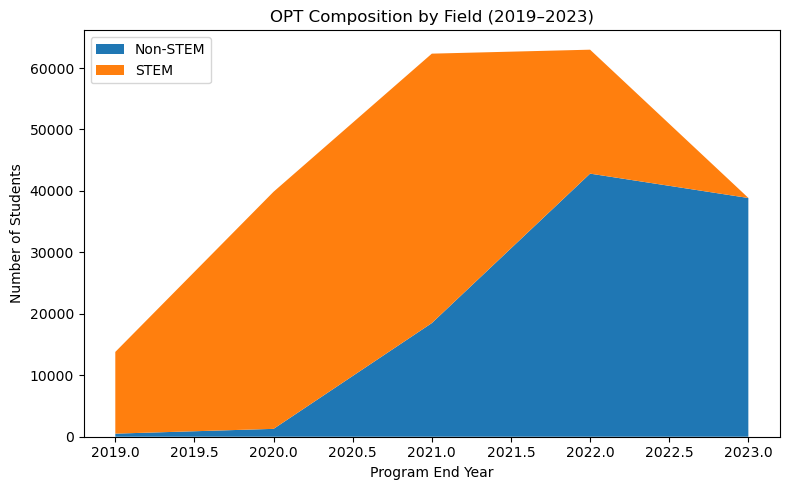

In [271]:
df = obs_main.groupby(["program_end_year", "is_stem"]) \
             .size().unstack()

df.columns = ["Non-STEM", "STEM"]

plt.figure(figsize=(8,5))
plt.stackplot(df.index,
              df["Non-STEM"],
              df["STEM"],
              labels=["Non-STEM", "STEM"])

plt.legend(loc="upper left")
plt.title("OPT Composition by Field (2019–2023)")
plt.xlabel("Program End Year")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

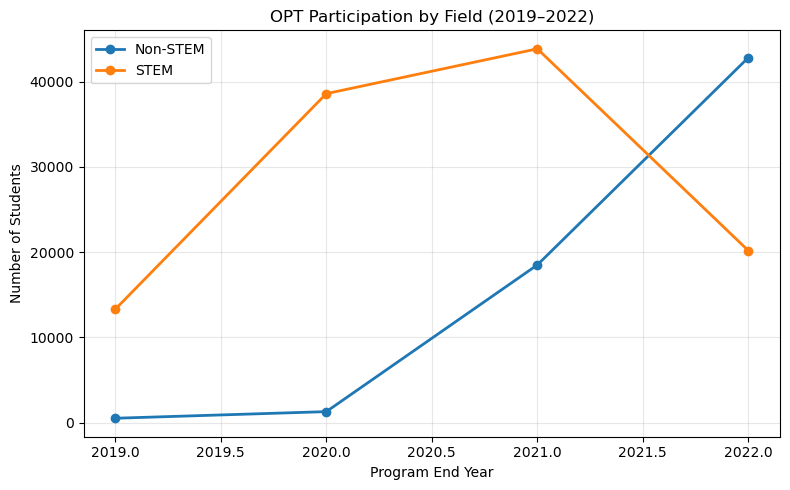

In [272]:
# Restrict to 2019–2022 (avoid incomplete 2023 cohort)
df_plot = df.loc[2019:2022].copy()

plt.figure(figsize=(8,5))

plt.plot(df_plot.index,
    df_plot["Non-STEM"],
    marker="o",
    linewidth=2,
    label="Non-STEM"
)

plt.plot(df_plot.index,
    df_plot["STEM"],
    marker="o",
    linewidth=2,
    label="STEM"
)

plt.title("OPT Participation by Field (2019–2022)")
plt.xlabel("Program End Year")
plt.ylabel("Number of Students")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Status Code (Dependent variable)

In [263]:
obs_main["status_code"].value_counts(normalize=True)

status_code
ACTIVE         0.476876
COMPLETED      0.424623
DEACTIVATED    0.078668
TERMINATED     0.019833
Name: proportion, dtype: float64

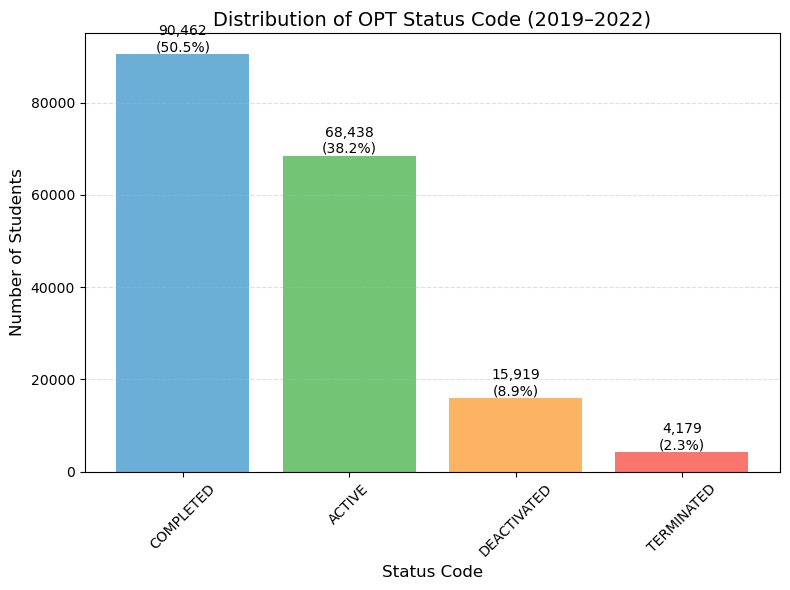

In [277]:
import matplotlib.pyplot as plt

# Restrict to complete cohorts
obs_status = obs[obs["program_end_year"].between(2019, 2022)]

# Count + sort
status_counts = obs_status["status_code"].value_counts().sort_values(ascending=False)
status_pct = (status_counts / status_counts.sum()) * 100

plt.figure(figsize=(8,6))

colors = ["#6BAED6", "#74C476", "#FDB462", "#F8766D"]  # soft pastel palette

bars = plt.bar(status_counts.index, status_counts.values, color=colors[:len(status_counts)])

plt.title("Distribution of OPT Status Code (2019–2022)", fontsize=14)
plt.xlabel("Status Code", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

plt.xticks(rotation=45)

# Grid
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add value + percent labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height):,}\n({status_pct.iloc[i]:.1f}%)',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

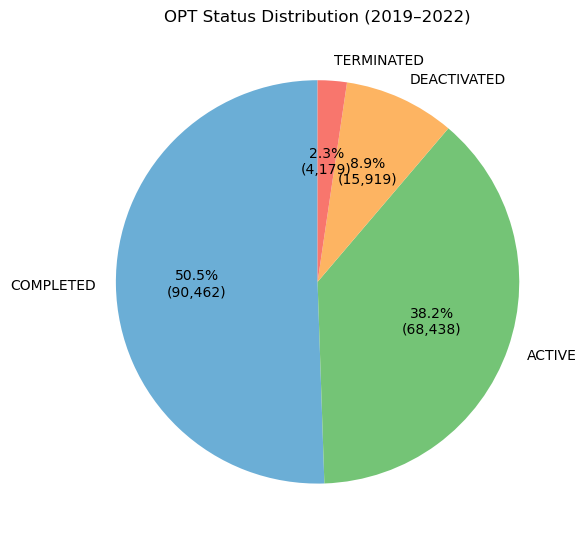

In [275]:
# Restrict to complete cohorts
obs_status = obs[obs["program_end_year"].between(2019, 2022)]

# Count status
status_counts = obs_status["status_code"].value_counts()

# Custom formatter (percentage + count)
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100))
        return f"{pct:.1f}%\n({count:,})"
    return my_format

plt.figure(figsize=(6,6))

colors = [
    "#6BAED6",   # ACTIVE - soft blue
    "#74C476",   # COMPLETED - soft green
    "#FDB462",   # DEACTIVATED - soft orange
    "#F8766D"    # TERMINATED - soft red
]

plt.pie(
    status_counts,
    labels=status_counts.index,
    autopct=autopct_format(status_counts),
    colors=colors,
    startangle=90
)

plt.title("OPT Status Distribution (2019–2022)")
plt.tight_layout()
plt.show()

### Major, Minor

In [266]:
obs_main["major1_title"].value_counts()

major1_title
ENGINEERING.                                                                         51788
COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES.                              48782
BUSINESS, MANAGEMENT, MARKETING, AND RELATED SUPPORT SERVICES.                       30340
BIOLOGICAL AND BIOMEDICAL SCIENCES.                                                  12648
MATHEMATICS AND STATISTICS.                                                          10349
SOCIAL SCIENCES.                                                                      9089
PHYSICAL SCIENCES.                                                                    8802
HEALTH PROFESSIONS AND RELATED PROGRAMS.                                              6939
VISUAL AND PERFORMING ARTS.                                                           6155
MULTI/INTERDISCIPLINARY STUDIES.                                                      5973
ENGINEERING/ENGINEERING-RELATED TECHNOLOGIES/TECHNICIANS.                    

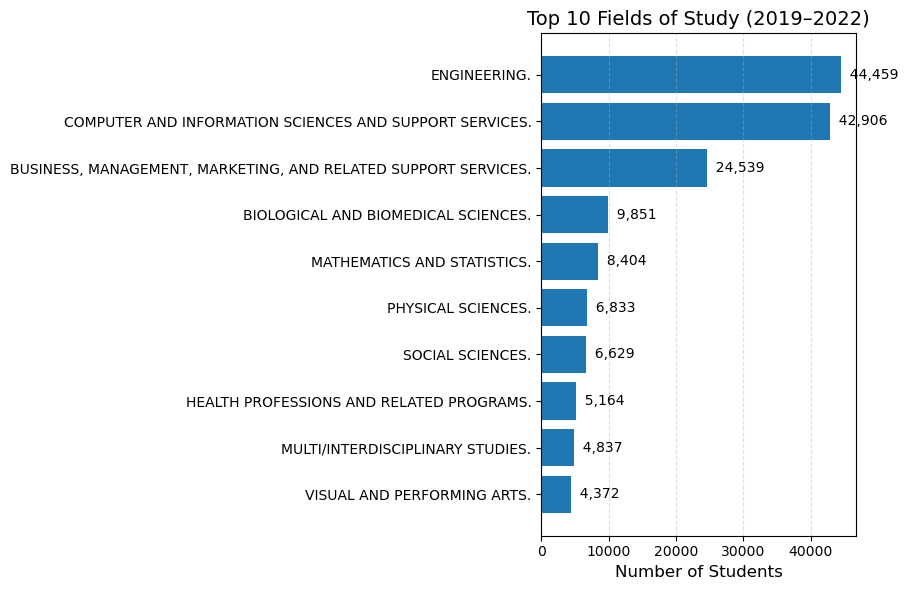

In [280]:
import matplotlib.pyplot as plt

obs_19_22 = obs[obs["program_end_year"].between(2019, 2022)].copy()

top10_major = (
    obs_19_22["major1_title"]
    .value_counts()
    .head(10)
    .sort_values()
)

plt.figure(figsize=(9,6))

bars = plt.barh(top10_major.index, top10_major.values)

plt.title("Top 10 Fields of Study (2019–2022)", fontsize=14)
plt.xlabel("Number of Students", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.4)

for i, v in enumerate(top10_major.values):
    plt.text(v, i, f"  {v:,}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

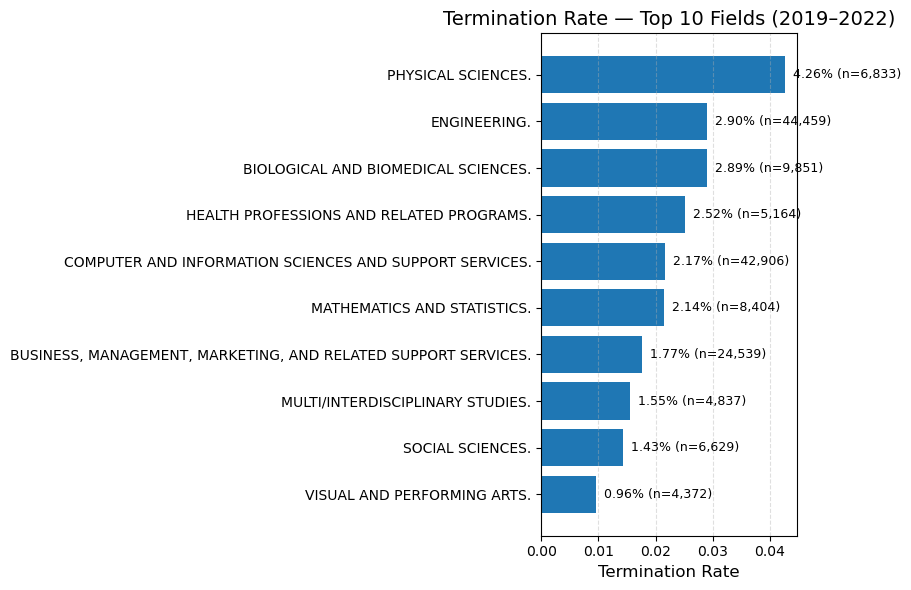

In [281]:
obs_19_22["terminated_flag"] = (
    obs_19_22["status_code"].str.upper() == "TERMINATED"
).astype(int)

top10_term = (
    obs_19_22.groupby("major1_title")
    .agg(
        n=("student_key", "size"),
        termination_rate=("terminated_flag", "mean")
    )
    .sort_values("n", ascending=False)
    .head(10)
    .sort_values("termination_rate")
)

plt.figure(figsize=(9,6))

bars = plt.barh(top10_term.index, top10_term["termination_rate"])

plt.title("Termination Rate — Top 10 Fields (2019–2022)", fontsize=14)
plt.xlabel("Termination Rate", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.4)

for i, (rate, n) in enumerate(zip(top10_term["termination_rate"], top10_term["n"])):
    plt.text(rate, i, f"  {rate:.2%} (n={n:,})", va="center", fontsize=9)

plt.tight_layout()
plt.show()

### STEM vs. Non-STEM

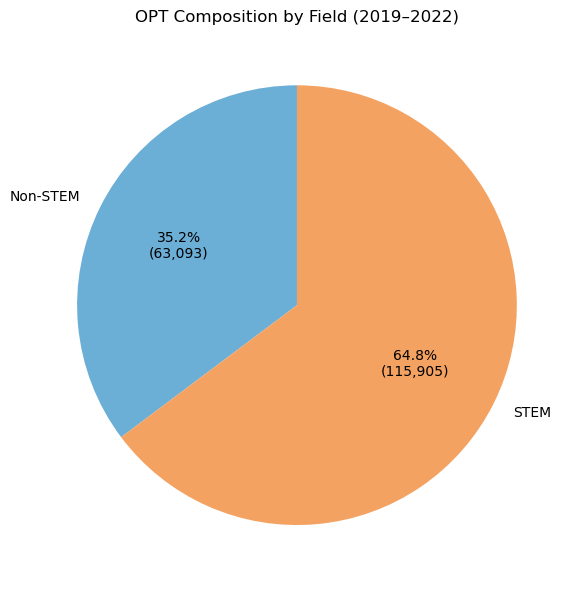

In [273]:
import matplotlib.pyplot as plt

# Restrict to complete cohorts
obs_plot = obs[obs["program_end_year"].between(2019, 2022)]

# Count STEM vs Non-STEM
counts = obs_plot["is_stem"].value_counts().sort_index()
counts.index = ["Non-STEM", "STEM"]

# Custom autopct to show % + count
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100))
        return f"{pct:.1f}%\n({count:,})"
    return my_format

plt.figure(figsize=(6,6))

colors = ["#6BAED6", "#F4A261"]  # soft blue + soft orange

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format(counts),
    colors=colors,
    startangle=90
)

plt.title("OPT Composition by Field (2019–2022)")
plt.tight_layout()
plt.show()

### Education Level

In [288]:
edu_term = (
    obs_19_22.groupby("student_edu_level_desc")
    .agg(
        n=("student_key", "size"),
        termination_rate=("terminated_flag", "mean")
    )
)

edu_term

,n,termination_rate
student_edu_level_desc,,
BACHELOR'S,55234,0.013923
DOCTORATE,35116,0.045478
MASTER'S,88648,0.020452


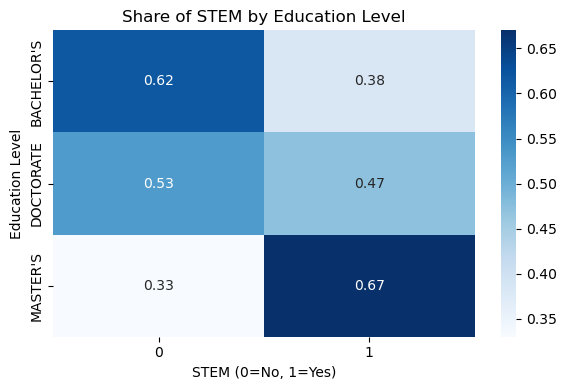

In [294]:
import seaborn as sns

stem_table = pd.crosstab(
    obs["student_edu_level_desc"],
    obs["is_stem"],
    normalize="index"
)

plt.figure(figsize=(6,4))
sns.heatmap(stem_table, annot=True, fmt=".2f", cmap="Blues")

plt.title("Share of STEM by Education Level")
plt.xlabel("STEM (0=No, 1=Yes)")
plt.ylabel("Education Level")

plt.tight_layout()
plt.show()

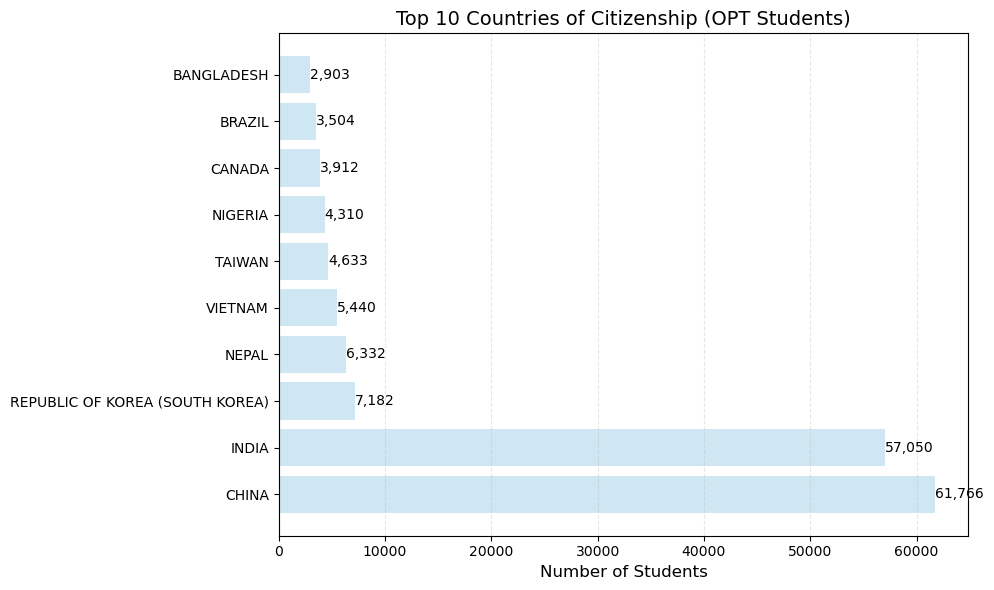

In [297]:
import matplotlib.pyplot as plt

# Top 10 countries
top10_country = (
    obs["country_of_citizenship"]
    .value_counts()
    .head(10)
    .sort_values()   # sort để barh đẹp
)

plt.figure(figsize=(10,6))

bars = plt.barh(top10_country.index, top10_country.values, color="#CEE7F3")

plt.gca().invert_yaxis()  # lớn nhất nằm trên cùng

plt.title("Top 10 Countries of Citizenship (OPT Students)", fontsize=14)
plt.xlabel("Number of Students", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()

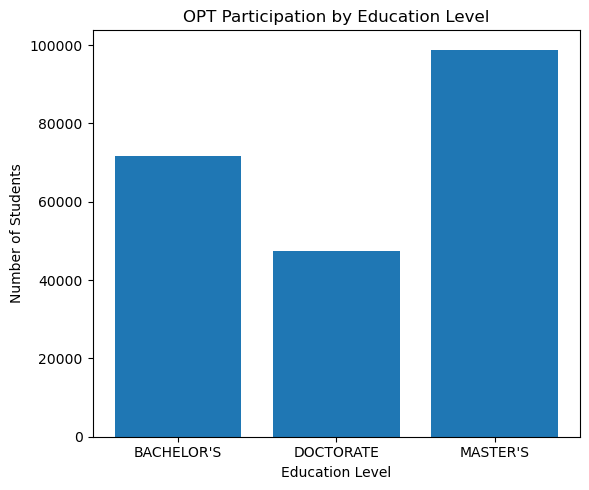

In [295]:
edu_counts = (
    obs["student_edu_level_desc"]
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(6,5))
plt.bar(edu_counts.index.astype(str), edu_counts.values)

plt.title("OPT Participation by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Students")

plt.tight_layout()
plt.show()

### Financial

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_88651/2113993024.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_88651/2113993024.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



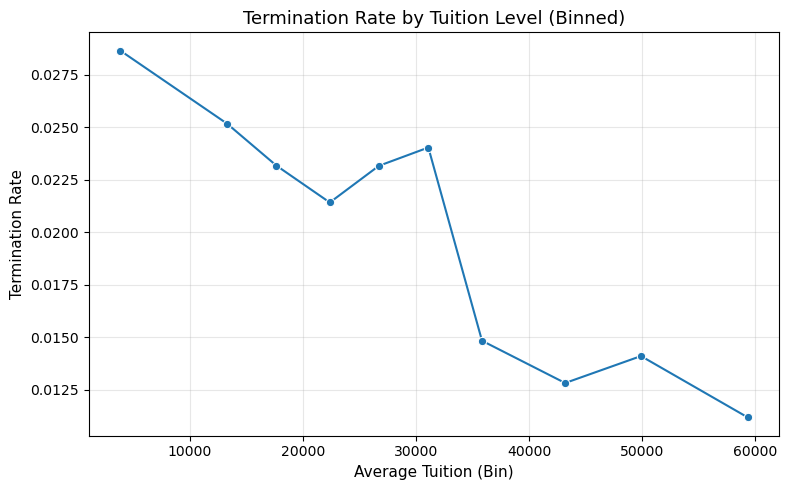

In [306]:
# Create termination dummy
obs["terminated"] = (obs["status_code"] == "TERMINATED").astype(int)

# Remove extreme tuition outliers (optional but recommended)
obs_plot = obs[obs["tuition_and_fees"].between(
    obs["tuition_and_fees"].quantile(0.01),
    obs["tuition_and_fees"].quantile(0.99)
)]

# Create tuition bins (10 groups)
obs_plot["tuition_bin"] = pd.qcut(
    obs_plot["tuition_and_fees"], 
    10, 
    duplicates="drop"
)

# Calculate mean termination per bin
bin_data = (
    obs_plot
    .groupby("tuition_bin")
    .agg(
        avg_tuition=("tuition_and_fees", "mean"),
        termination_rate=("terminated", "mean")
    )
    .reset_index()
)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(data=bin_data, 
             x="avg_tuition", 
             y="termination_rate",
             marker="o")

plt.title("Termination Rate by Tuition Level (Binned)", fontsize=13)
plt.xlabel("Average Tuition (Bin)", fontsize=11)
plt.ylabel("Termination Rate", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/3519540495.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0, g1], labels=["Not Terminated", "Terminated"])


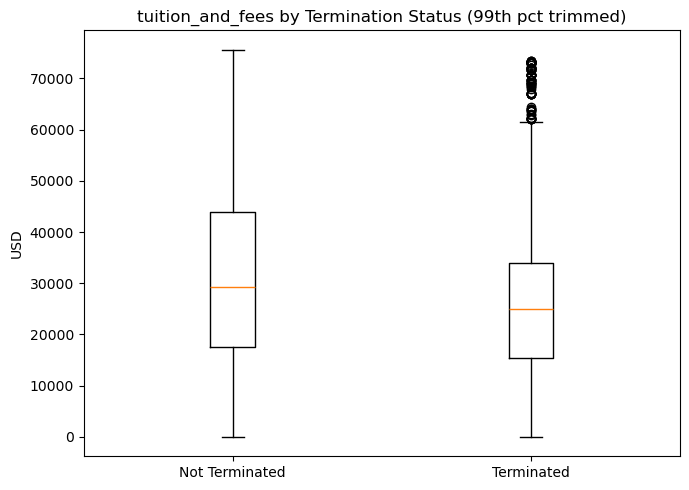

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/3519540495.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0, g1], labels=["Not Terminated", "Terminated"])


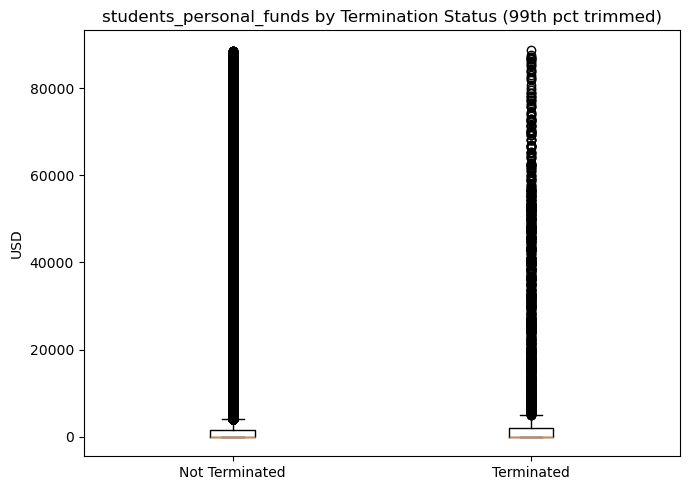

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/3519540495.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0, g1], labels=["Not Terminated", "Terminated"])


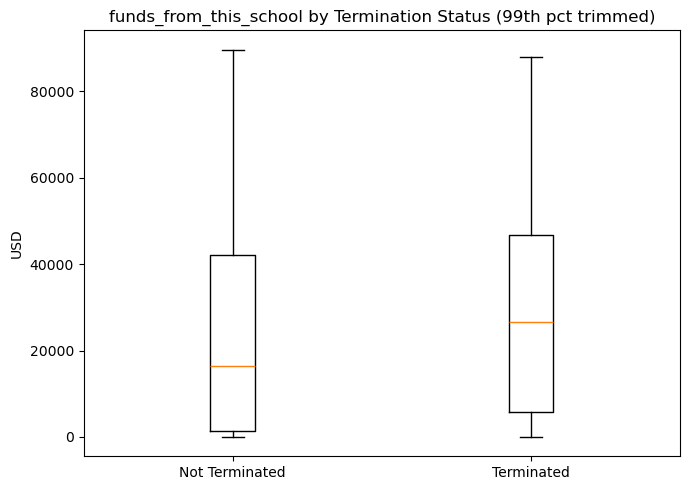

/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/3519540495.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([g0, g1], labels=["Not Terminated", "Terminated"])


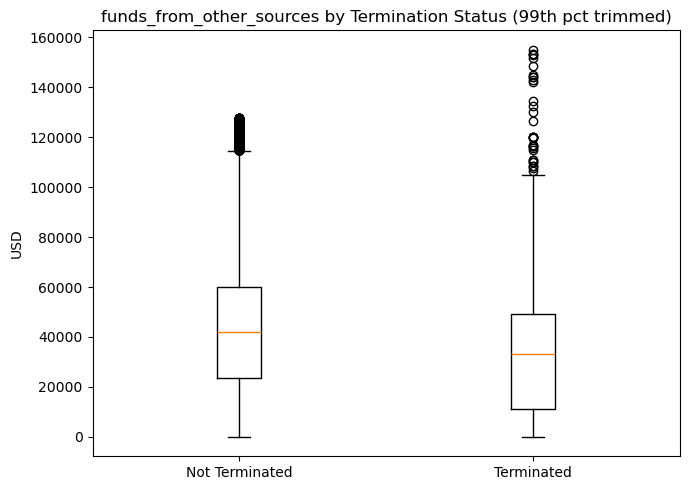

In [215]:
opt_clean["terminated_flag"] = (opt_clean["status_code"] == "TERMINATED").astype(int)

fin_cols = [
    "tuition_and_fees",
    "students_personal_funds",
    "funds_from_this_school",
    "funds_from_other_sources"
]

for col in fin_cols:
    g0 = opt_clean[opt_clean["terminated_flag"] == 0][col].dropna()
    g1 = opt_clean[opt_clean["terminated_flag"] == 1][col].dropna()

    # trim both at 99th percentile for fairness
    u0, u1 = np.percentile(g0, 99), np.percentile(g1, 99)
    g0, g1 = g0[g0 <= u0], g1[g1 <= u1]

    plt.figure(figsize=(7,5))
    plt.boxplot([g0, g1], labels=["Not Terminated", "Terminated"])
    plt.title(f"{col} by Termination Status (99th pct trimmed)")
    plt.ylabel("USD")
    plt.tight_layout()
    plt.show()

In [195]:
pd.crosstab(opt_clean["status_code"], opt_clean["is_stem"], normalize="index")

is_stem,0,1
status_code,,
ACTIVE,0.493139,0.506861
COMPLETED,0.420466,0.579534
DEACTIVATED,0.618534,0.381466
TERMINATED,0.277161,0.722839


/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/2469014166.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom[j] + values[j]/2,
/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/2469014166.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{values[j]*100:.1f}%",
/var/folders/5s/w1gzqg4x63n2d89hw0mzlhxh0000gn/T/ipykernel_83739/2469014166.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
 

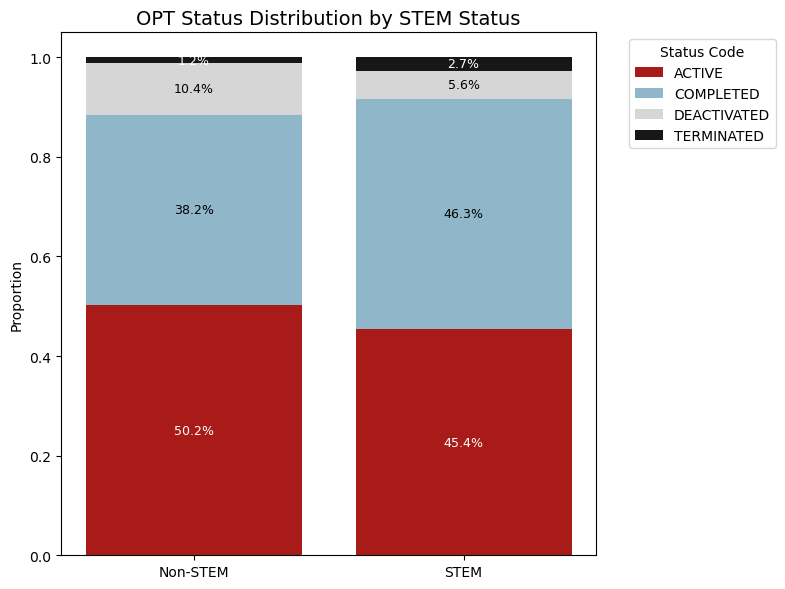

In [206]:
# Create normalized cross-tab
ct = pd.crosstab(
    opt_clean["is_stem"],
    opt_clean["status_code"],
    normalize="index"
)

ct.index = ["Non-STEM", "STEM"]

colors = ["#A91B18", "#8FB7C9", "#D6D6D6", "#181717"]

plt.figure(figsize=(8,6))

bottom = [0, 0]

for i, col in enumerate(ct.columns):
    values = ct[col]
    plt.bar(ct.index, values, bottom=bottom, color=colors[i], label=col)
    
    # Add percentage labels inside bars
    for j in range(len(values)):
        plt.text(
            j,
            bottom[j] + values[j]/2,
            f"{values[j]*100:.1f}%",
            ha='center',
            va='center',
            color='white' if colors[i] in ["#A91B18", "#181717"] else 'black',
            fontsize=9
        )
    bottom = [bottom[k] + values[k] for k in range(len(values))]

plt.title("OPT Status Distribution by STEM Status", fontsize=14)
plt.ylabel("Proportion")
plt.legend(title="Status Code", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

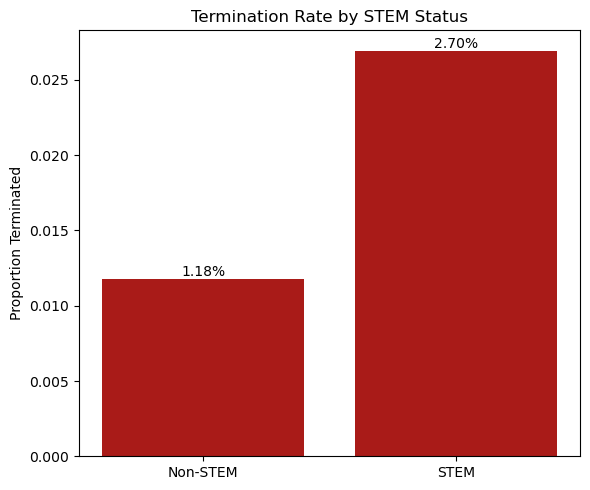

In [207]:
termination = pd.crosstab(
    opt_clean["is_stem"],
    opt_clean["status_code"] == "TERMINATED",
    normalize="index"
)

termination.index = ["Non-STEM", "STEM"]

plt.figure(figsize=(6,5))
plt.bar(termination.index, termination[True], color="#A91B18")

plt.title("Termination Rate by STEM Status")
plt.ylabel("Proportion Terminated")

for i, v in enumerate(termination[True]):
    plt.text(i, v, f"{v*100:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Correlation Heat Map

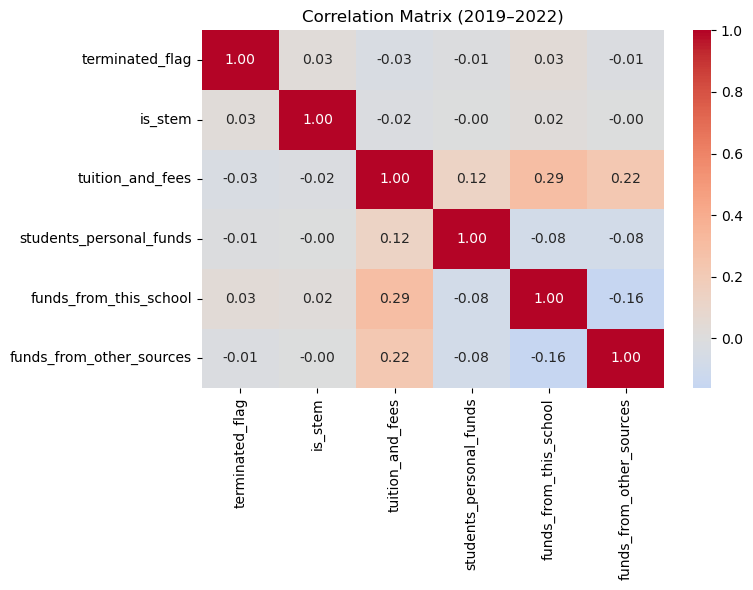

In [285]:
# Work on 2019–2022
obs_19_22 = obs[obs["program_end_year"].between(2019, 2022)].copy()

# Create termination flag
obs_19_22["terminated_flag"] = (
    obs_19_22["status_code"].str.upper() == "TERMINATED"
).astype(int)

num_cols = [
    "terminated_flag",
    "is_stem",
    "tuition_and_fees",
    "students_personal_funds",
    "funds_from_this_school",
    "funds_from_other_sources"
]

corr = obs_19_22[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix (2019–2022)")
plt.tight_layout()
plt.show()

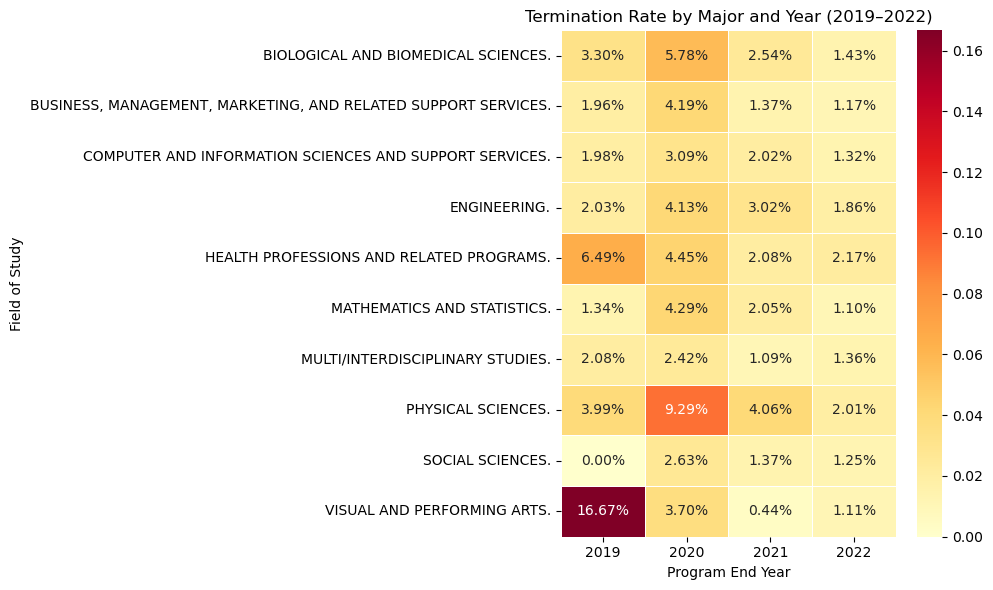

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# Restrict to 2019–2022
obs_19_22 = obs[obs["program_end_year"].between(2019, 2022)].copy()

# Termination flag
obs_19_22["terminated_flag"] = (
    obs_19_22["status_code"].str.upper() == "TERMINATED"
).astype(int)

# Top 10 majors by size
top10 = (
    obs_19_22["major1_title"]
    .value_counts()
    .head(10)
    .index
)

# Filter to top 10
df_heat = obs_19_22[obs_19_22["major1_title"].isin(top10)]

# Create pivot table: major × year
heat_data = (
    df_heat.groupby(["major1_title", "program_end_year"])["terminated_flag"]
    .mean()
    .unstack()
)

plt.figure(figsize=(10,6))

sns.heatmap(
    heat_data,
    annot=True,
    fmt=".2%",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title("Termination Rate by Major and Year (2019–2022)")
plt.xlabel("Program End Year")
plt.ylabel("Field of Study")

plt.tight_layout()
plt.show()

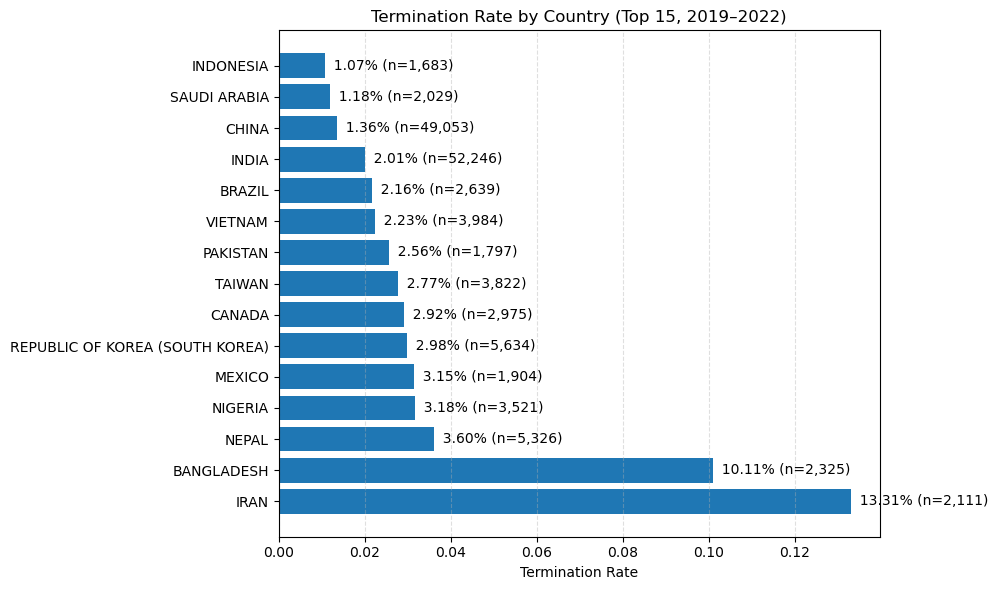

In [287]:
obs_19_22 = obs[obs["program_end_year"].between(2019, 2022)].copy()

obs_19_22["terminated_flag"] = (
    obs_19_22["status_code"].str.upper() == "TERMINATED"
).astype(int)

# Top 15 countries by size
top15_countries = (
    obs_19_22["country_of_citizenship"]
    .value_counts()
    .head(15)
    .index
)

df_country = obs_19_22[
    obs_19_22["country_of_citizenship"].isin(top15_countries)
]

country_term = (
    df_country.groupby("country_of_citizenship")
    .agg(
        n=("student_key", "size"),
        termination_rate=("terminated_flag", "mean")
    )
    .sort_values("termination_rate", ascending=False)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bars = plt.barh(country_term.index, country_term["termination_rate"])

plt.title("Termination Rate by Country (Top 15, 2019–2022)")
plt.xlabel("Termination Rate")

plt.grid(axis="x", linestyle="--", alpha=0.4)

for i, (rate, n) in enumerate(zip(country_term["termination_rate"], country_term["n"])):
    plt.text(rate, i, f"  {rate:.2%} (n={n:,})", va="center")

plt.tight_layout()
plt.show()

In [307]:
obs["terminated"] = (obs["status_code"] == "TERMINATED").astype(int)

major_term = (
    obs.groupby("major1_title")
    .agg(
        total=("student_key", "count"),
        termination_rate=("terminated", "mean")
    )
    .query("total > 1000")
    .sort_values("termination_rate", ascending=False)
)

major_term.head(10)

,total,termination_rate
major1_title,,
PHYSICAL SCIENCES.,8802,0.033856
AGRICULTURAL/ANIMAL/PLANT/VETERINARY SCIENCE AND RELATED FIELDS.,1771,0.031621
NATURAL RESOURCES AND CONSERVATION.,1314,0.028919
ENGINEERING.,51794,0.025408
ENGINEERING/ENGINEERING-RELATED TECHNOLOGIES/TECHNICIANS.,3742,0.023784
BIOLOGICAL AND BIOMEDICAL SCIENCES.,12651,0.023002
HEALTH PROFESSIONS AND RELATED PROGRAMS.,6939,0.020032
COMPUTER AND INFORMATION SCIENCES AND SUPPORT SERVICES.,48783,0.019638
MATHEMATICS AND STATISTICS.,10349,0.017876


## 3. Machine Learning

In [326]:
# Indicators
obs_main["has_major2"] = obs_main["major2_title"].notna().astype(int)
obs_main["has_minor"] = obs_main["minor_title"].notna().astype(int)

def assign_structure(row):
    if row["has_major2"] == 0 and row["has_minor"] == 0:
        return 0  # Single major
    elif row["has_major2"] == 1 and row["has_minor"] == 0:
        return 1  # Double major
    elif row["has_major2"] == 0 and row["has_minor"] == 1:
        return 2  # Major + minor
    else:
        return 3  # Double major + minor

obs_main["major_structure_code"] = obs_main.apply(assign_structure, axis=1)

In [327]:
print(obs_main["major_structure_code"].value_counts())
print(obs_main[["has_major2", "has_minor"]].value_counts())

major_structure_code
0    193522
1     12823
2      9892
3      1629
Name: count, dtype: int64
has_major2  has_minor
0           0            193522
1           0             12823
0           1              9892
1           1              1629
Name: count, dtype: int64


In [329]:
structure_summary = (
    obs_main.groupby("major_structure_code")
    .agg(
        n=("student_key", "size"),
        termination_rate=("terminated_flag", "mean")
    )
)

print(structure_summary)

                           n  termination_rate
major_structure_code                          
0                     193522          0.020638
1                      12823          0.016065
2                       9892          0.010615
3                       1629          0.009822


Regression

In [309]:
obs_main["terminated"] = (obs_main["status_code"] == "TERMINATED").astype(int)

X = obs_main[["is_stem", 
         "tuition_and_fees", 
         "students_personal_funds",
         "funds_from_this_school",
         "funds_from_other_sources"]]

y = obs_main["terminated"]

In [311]:
reg_df = pd.concat([X, y], axis=1).dropna()
print("Observations after dropna:", len(reg_df))

Observations after dropna: 78381


In [312]:
import statsmodels.api as sm

X_clean = reg_df.drop(columns=["terminated"])
y_clean = reg_df["terminated"]

X_clean = sm.add_constant(X_clean)

model = sm.Logit(y_clean, X_clean).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.097325
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             terminated   No. Observations:                78381
Model:                          Logit   Df Residuals:                    78375
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Feb 2026   Pseudo R-squ.:                 0.02422
Time:                        22:37:43   Log-Likelihood:                -7628.5
converged:                       True   LL-Null:                       -7817.8
Covariance Type:            nonrobust   LLR p-value:                 1.146e-79
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.0914      0.065    -62.885      0.000      -4.219

In [330]:
top_countries = obs["country_of_citizenship"].value_counts().head(10).index

obs["country_group"] = obs["country_of_citizenship"].where(
    obs["country_of_citizenship"].isin(top_countries),
    "Other"
)

top_majors = obs["major1_title"].value_counts().head(10).index

obs["major_group"] = obs["major1_title"].where(
    obs["major1_title"].isin(top_majors),
    "Other"
)

model_vars = [
    "terminated",
    "is_stem",
    "tuition_and_fees",
    "student_edu_level_desc",
    "country_group",
    "major_group"
]

reg_df = obs[model_vars].dropna()
print("Regression sample size:", len(reg_df))

Regression sample size: 217867
